In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing

In [2]:
with open("Traffic_violations.csv", "r") as csv_file:
    headers = " ".join([line.strip() for line in csv_file.readlines()[:2]]).split(",")

df = pd.read_csv("Traffic_violations.csv", encoding="Latin-1", delimiter=",",
                   skiprows=1, header=None).iloc[:, 1:]

/var/folders/q2/k9xdm7wn3_7cpc75plnlzl640000gn/T/ipykernel_82818/2694403725.py:4: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Traffic_violations.csv", encoding="Latin-1", delimiter=",",


In [3]:
print(df.shape)
df.head(3)

(1859607, 42)


,1,2,3,4,5,6,7,8,9,10,...,33,34,35,36,37,38,39,40,41,42
0,05/01/2023,23:11:00,MCP,"3rd District, Silver Spring",OPERATING UNREGISTERED MOTOR VEHICLE ON HIGHWAY,BRIGGS CHANEY RD @ COLUMIBA PIKE,0.000000,0.000000,No,No,...,13-401(b1),Transportation Article,False,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,"(0.0, 0.0)"
1,04/30/2023,23:55:00,MCP,"4th District, Wheaton",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,KEMP MILL ROAD @ ALPERT LANE,39.053038,-77.024637,No,No,...,13-401(h),Transportation Article,False,WHITE,F,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.0530383333333, -77.0246366666667)"
2,04/30/2023,04:24:00,MCP,"2nd District, Bethesda",NEGLIGENT DRIVING VEHICLE IN CARELESS AND IMPR...,JONES MILL ROAD/ LE VELLE DRIVE,38.991480,-77.097113,No,No,...,21-901.1(b),Transportation Article,False,BLACK,F,SILVER SPRING,MD,MD,A - Marked Patrol,"(38.99148, -77.0971133333333)"


In [4]:
# 'SeqID',
df.columns=['Date_Of_Stop','Time_Of_Stop','Agency','SubAgency','Description','Location',
'Latitude','Longitude','Accident','Belts','Personal_Injury','Property_Damage','Fatal',
'Commercial_License','HAZMAT','Commercial_Vehicle','Alcohol','Work_Zone','Search_Conducted',
'Search_Disposition','Search_Outcome','Search_Reason','Search_Reason_For_Stop','Search_Type',
'Search_Arrest_Reason','State','VehicleType','Year','Make','Model','Color','Violation_Type',
'Charge','Article','Contributed_To_Accident','Race','Gender','Driver_City','Driver_State','DL_State', 
'Arrest_Type', 'Geolocation']

In [9]:
pd.set_option('display.max_columns', None)
df.head()

,Date_Of_Stop,Time_Of_Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal_Injury,Property_Damage,Fatal,Commercial_License,HAZMAT,Commercial_Vehicle,Alcohol,Work_Zone,Search_Conducted,Search_Disposition,Search_Outcome,Search_Reason,Search_Reason_For_Stop,Search_Type,Search_Arrest_Reason,State,VehicleType,Year,Make,Model,Color,Violation_Type,Charge,Article,Contributed_To_Accident,Race,Gender,Driver_City,Driver_State,DL_State,Arrest_Type,Geolocation
0,05/01/2023,23:11:00,MCP,"3rd District, Silver Spring",OPERATING UNREGISTERED MOTOR VEHICLE ON HIGHWAY,BRIGGS CHANEY RD @ COLUMIBA PIKE,0.000000,0.000000,No,No,No,No,No,No,No,No,No,No,No,NaN,Citation,NaN,17-107(a1),NaN,NaN,MD,02 - Automobile,2007.0,CHEV,CRUZ,BLACK,Citation,13-401(b1),Transportation Article,False,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,"(0.0, 0.0)"
1,04/30/2023,23:55:00,MCP,"4th District, Wheaton",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,KEMP MILL ROAD @ ALPERT LANE,39.053038,-77.024637,No,No,No,No,No,No,No,No,No,No,No,NaN,Citation,NaN,55*,NaN,NaN,MD,02 - Automobile,2013.0,HYUNDAI,SONATA,RED,Citation,13-401(h),Transportation Article,False,WHITE,F,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.0530383333333, -77.0246366666667)"
2,04/30/2023,04:24:00,MCP,"2nd District, Bethesda",NEGLIGENT DRIVING VEHICLE IN CARELESS AND IMPR...,JONES MILL ROAD/ LE VELLE DRIVE,38.991480,-77.097113,No,No,No,No,No,No,No,No,No,No,No,NaN,Citation,NaN,21-304(c),NaN,NaN,MD,02 - Automobile,2019.0,NISSAN,ALTIMA,GRAY,Citation,21-901.1(b),Transportation Article,False,BLACK,F,SILVER SPRING,MD,MD,A - Marked Patrol,"(38.99148, -77.0971133333333)"
3,04/30/2023,04:24:00,MCP,"2nd District, Bethesda",RECKLESS DRIVING VEHICLE IN WANTON AND WILLFUL...,JONES MILL ROAD/ LE VELLE DRIVE,38.991480,-77.097113,No,No,No,No,No,No,No,No,No,No,No,NaN,Citation,NaN,21-304(c),NaN,NaN,MD,02 - Automobile,2019.0,NISSAN,ALTIMA,GRAY,Citation,21-901.1(a),Transportation Article,False,BLACK,F,SILVER SPRING,MD,MD,A - Marked Patrol,"(38.99148, -77.0971133333333)"
4,04/30/2023,04:24:00,MCP,"2nd District, Bethesda",FAILURE TO DRIVE VEHICLE ON RIGHT HALF OF ROAD...,JONES MILL ROAD/ LE VELLE DRIVE,38.991480,-77.097113,No,No,No,No,No,No,No,No,No,No,No,NaN,Citation,NaN,21-304(c),NaN,NaN,MD,02 - Automobile,2019.0,NISSAN,ALTIMA,GRAY,Citation,21-301(a),Transportation Article,False,BLACK,F,SILVER SPRING,MD,MD,A - Marked Patrol,"(38.99148, -77.0971133333333)"


## Cleaning and transforming 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1859607 entries, 0 to 1859606
Data columns (total 42 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Date_Of_Stop             object 
 1   Time_Of_Stop             object 
 2   Agency                   object 
 3   SubAgency                object 
 4   Description              object 
 5   Location                 object 
 6   Latitude                 float64
 7   Longitude                float64
 8   Accident                 object 
 9   Belts                    object 
 10  Personal_Injury          object 
 11  Property_Damage          object 
 12  Fatal                    object 
 13  Commercial_License       object 
 14  HAZMAT                   object 
 15  Commercial_Vehicle       object 
 16  Alcohol                  object 
 17  Work_Zone                object 
 18  Search_Conducted         object 
 19  Search_Disposition       object 
 20  Search_Outcome           object 
 21  Search_R

In [26]:
data = df.copy()
del data['Geolocation']
data['Date_Of_Stop'] = pd.to_datetime(data['Date_Of_Stop'])
#data['Year'] = data['Year'].astype('float64').round(0)
#data['Year'] = data['Year'].apply(int)

#data['Year'][0]

In [27]:
data['Time_Of_Stop'] = pd.to_datetime(data['Time_Of_Stop'], format='%H:%M:%S').dt.time
data['Day_of_Week'] = data['Date_Of_Stop'].dt.day_name()
data['Hour_of_Day'] = data['Time_Of_Stop'].apply(lambda x: x.hour)
pd.set_option('display.max_columns', None)
data.head()

,Date_Of_Stop,Time_Of_Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal_Injury,Property_Damage,Fatal,Commercial_License,HAZMAT,Commercial_Vehicle,Alcohol,Work_Zone,Search_Conducted,Search_Disposition,Search_Outcome,Search_Reason,Search_Reason_For_Stop,Search_Type,Search_Arrest_Reason,State,VehicleType,Year,Make,Model,Color,Violation_Type,Charge,Article,Contributed_To_Accident,Race,Gender,Driver_City,Driver_State,DL_State,Arrest_Type,Day_of_Week,Hour_of_Day
0,2023-05-01,23:11:00,MCP,"3rd District, Silver Spring",OPERATING UNREGISTERED MOTOR VEHICLE ON HIGHWAY,BRIGGS CHANEY RD @ COLUMIBA PIKE,0.000000,0.000000,No,No,No,No,No,No,No,No,No,No,No,NaN,Citation,NaN,17-107(a1),NaN,NaN,MD,02 - Automobile,2007.0,CHEV,CRUZ,BLACK,Citation,13-401(b1),Transportation Article,False,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,Monday,23
1,2023-04-30,23:55:00,MCP,"4th District, Wheaton",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,KEMP MILL ROAD @ ALPERT LANE,39.053038,-77.024637,No,No,No,No,No,No,No,No,No,No,No,NaN,Citation,NaN,55*,NaN,NaN,MD,02 - Automobile,2013.0,HYUNDAI,SONATA,RED,Citation,13-401(h),Transportation Article,False,WHITE,F,SILVER SPRING,MD,MD,A - Marked Patrol,Sunday,23
2,2023-04-30,04:24:00,MCP,"2nd District, Bethesda",NEGLIGENT DRIVING VEHICLE IN CARELESS AND IMPR...,JONES MILL ROAD/ LE VELLE DRIVE,38.991480,-77.097113,No,No,No,No,No,No,No,No,No,No,No,NaN,Citation,NaN,21-304(c),NaN,NaN,MD,02 - Automobile,2019.0,NISSAN,ALTIMA,GRAY,Citation,21-901.1(b),Transportation Article,False,BLACK,F,SILVER SPRING,MD,MD,A - Marked Patrol,Sunday,4
3,2023-04-30,04:24:00,MCP,"2nd District, Bethesda",RECKLESS DRIVING VEHICLE IN WANTON AND WILLFUL...,JONES MILL ROAD/ LE VELLE DRIVE,38.991480,-77.097113,No,No,No,No,No,No,No,No,No,No,No,NaN,Citation,NaN,21-304(c),NaN,NaN,MD,02 - Automobile,2019.0,NISSAN,ALTIMA,GRAY,Citation,21-901.1(a),Transportation Article,False,BLACK,F,SILVER SPRING,MD,MD,A - Marked Patrol,Sunday,4
4,2023-04-30,04:24:00,MCP,"2nd District, Bethesda",FAILURE TO DRIVE VEHICLE ON RIGHT HALF OF ROAD...,JONES MILL ROAD/ LE VELLE DRIVE,38.991480,-77.097113,No,No,No,No,No,No,No,No,No,No,No,NaN,Citation,NaN,21-304(c),NaN,NaN,MD,02 - Automobile,2019.0,NISSAN,ALTIMA,GRAY,Citation,21-301(a),Transportation Article,False,BLACK,F,SILVER SPRING,MD,MD,A - Marked Patrol,Sunday,4


In [28]:
# Too heavy for my pc
"""
data[['Arrest_Category', 'Arrest_Description']] = data['Arrest_Type'].apply(lambda x: pd.Series(str(x).split(" - ")))
data[['Vehicle_Category', 'Vehicle_Type']] = data['VehicleType'].apply(lambda x: pd.Series(str(x).split(" - ")))
"""

'\ndata[[\'Arrest_Category\', \'Arrest_Description\']] = data[\'Arrest_Type\'].apply(lambda x: pd.Series(str(x).split(" - ")))\ndata[[\'Vehicle_Category\', \'Vehicle_Type\']] = data[\'VehicleType\'].apply(lambda x: pd.Series(str(x).split(" - ")))\n'

## Duplicates

In [29]:
data.loc[data.duplicated(), :]

,Date_Of_Stop,Time_Of_Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal_Injury,Property_Damage,Fatal,Commercial_License,HAZMAT,Commercial_Vehicle,Alcohol,Work_Zone,Search_Conducted,Search_Disposition,Search_Outcome,Search_Reason,Search_Reason_For_Stop,Search_Type,Search_Arrest_Reason,State,VehicleType,Year,Make,Model,Color,Violation_Type,Charge,Article,Contributed_To_Accident,Race,Gender,Driver_City,Driver_State,DL_State,Arrest_Type,Day_of_Week,Hour_of_Day
2265,2023-05-11,08:20:00,MCP,"2nd District, Bethesda",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,HILLCREST ST/ROSEMARY CIR,38.977375,-77.080544,No,No,No,No,No,No,No,No,No,No,No,NaN,Warning,NaN,21-201(a1),NaN,NaN,DC,02 - Automobile,2018.0,BUICK,SUV,GRAY,Warning,21-201(a1),Transportation Article,False,WHITE,F,WASHINGTON,DC,DC,A - Marked Patrol,Thursday,8
2266,2023-05-11,08:20:00,MCP,"2nd District, Bethesda",DISPLAYING EXPIRED REGISTRATION PLATE ISSUED B...,HILLCREST ST/ROSEMARY CIR,38.977375,-77.080544,No,No,No,No,No,No,No,No,No,No,No,NaN,Warning,NaN,21-201(a1),NaN,NaN,DC,02 - Automobile,2018.0,BUICK,SUV,GRAY,Warning,13-411(f),Transportation Article,False,WHITE,F,WASHINGTON,DC,DC,A - Marked Patrol,Thursday,8
16472,2014-06-07,20:42:00,MCP,"4th District, Wheaton",FAILURE MOTOR VEH. DRIVER TO FURNISH WRITTEN I...,"2303 GEORGIAN WAY, WHEATON MD",39.058958,-77.049192,No,No,No,Yes,No,No,No,No,No,No,No,NaN,Citation,NaN,21-902(a1),NaN,NaN,MD,02 - Automobile,2006.0,CHEVY,TRUCK,WHITE,Citation,20-105(c),Transportation Article,False,HISPANIC,M,WHEATON,MD,MD,A - Marked Patrol,Saturday,20
19035,2012-01-20,13:23:00,MCP,"1st District, Rockville",DRIVING/ATTEMPTING DRIVE MOTOR VEH. ON HWY W/O...,NELSON ST/ WOODLEY GARDENS PARK,39.091862,-77.173584,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MD,02 - Automobile,2011.0,CHEV,CAMERY,GRAY,Citation,16-101(a),Transportation Article,False,BLACK,M,POTOMAC,MD,MD,A - Marked Patrol,Friday,13
22329,2020-06-25,12:12:00,MCP,"6th District, Gaithersburg / Montgomery Village",FAIL OF DRIVER IN ATTEND VEH ACCIDENT TO FURNI...,SHADY GROVE RD @ 355,39.154040,-77.211366,Yes,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MD,02 - Automobile,2017.0,ACURA,TK,BLACK,Citation,20-104(b),Transportation Article,True,WHITE,M,BROOKVILLE,MD,MD,A - Marked Patrol,Thursday,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840250,2012-08-31,15:12:00,MCP,"2nd District, Bethesda",Stop Lights,RTE 121/GATEWAY CENTER DR,39.236653,-77.283049,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MD,05 - Light Duty Truck,2009.0,CHEV,BOX,WHITE,SERO,64*,NaN,False,WHITE,M,WALKERSVILLE,MD,MD,A - Marked Patrol,Friday,15
1842673,2012-02-23,10:31:00,MCP,"2nd District, Bethesda",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,MAC ARTHUR BLVD @ UNION ARCH BRIDGE,38.972809,-77.147364,No,No,No,No,No,No,No,Yes,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MD,05 - Light Duty Truck,1999.0,CHEV,TK,WHITE,Warning,21-201(a1),Transportation Article,False,WHITE,M,JOPPA,MD,MD,A - Marked Patrol,Thursday,10
1842886,2012-04-05,22:08:00,MCP,"1st District, Rockville",FAILURE TO PROPERLY EQUIP & LOCATE HEADLAMPS O...,TWINBROOK PKWY/ARDENNES,39.065394,-77.115215,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MD,02 - Automobile,2003.0,TOY,COROLLA,MAROON,Warning,22-203(b),Transportation Article,False,BLACK,F,TAKOMA PARK,MD,MD,A - Marked Patrol,Thursday,22
1847309,2012-08-31,15:12:00,MCP,"2nd District, Bethesda",Taillights,RTE 121/GATEWAY CENTER DR,39.236653,-77.283049,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MD,05 - Light Duty Truck,2009.0,CHEV,BOX,WHITE,SERO,56*,NaN,False,WHITE,M,WALKERSVILLE,MD,MD,A - Marked Patrol,Friday,15


In [30]:
data.drop_duplicates(keep='first', inplace=True)

## Missing values

In [31]:
percent_missing = data.isnull().sum() * 100 / len(df)
percent_missing.sort_values(ascending=False)

Search_Arrest_Reason       96.833417
Search_Type                95.422796
Search_Reason              95.422420
Search_Disposition         95.422420
Search_Outcome             38.901123
Search_Reason_For_Stop     37.881284
Search_Conducted           37.866926
Article                     4.594143
Color                       1.152286
Year                        0.554418
DL_State                    0.049957
Driver_City                 0.023338
Model                       0.011454
Make                        0.003657
State                       0.003173
Driver_State                0.000592
Description                 0.000538
Location                    0.000215
Personal_Injury             0.000000
Date_Of_Stop                0.000000
Belts                       0.000000
Accident                    0.000000
Longitude                   0.000000
Latitude                    0.000000
SubAgency                   0.000000
Time_Of_Stop                0.000000
Agency                      0.000000
V

In [32]:
data.Search_Arrest_Reason.value_counts(normalize=True) * 100

Search_Arrest_Reason
Stop         63.563839
Search       19.961877
Other        11.228776
Warrant       5.164319
Traffic       0.040594
DUI           0.022945
Marihuana     0.008825
Criminal      0.005295
DWI           0.003530
Name: proportion, dtype: float64

In [33]:
print('Search_Arrest_Reason: ',data.Search_Arrest_Reason.unique())
print('Search_Reason: ', data.Search_Reason.unique())
print('search type: ', data.Search_Type.unique())
print('HAZMAT: ', data.HAZMAT.unique())

Search_Arrest_Reason:  [nan 'Stop' 'Warrant' 'Search' 'Other' 'DUI' 'DWI' 'Traffic' 'Marihuana'
 'Criminal']
Search_Reason:  [nan 'Incident to Arrest' 'Consensual' 'Probable Cause' 'K-9' 'Other'
 'Exigent Circumstances' 'Arrest/Tow' 'Probable Cause for CDS'
 'plain view marijuana' 'DUI']
search type:  [nan 'Both' 'Property' 'Person' 'Search Incidental' 'car' 'PC']
HAZMAT:  ['No' 'Yes']


## General EDA

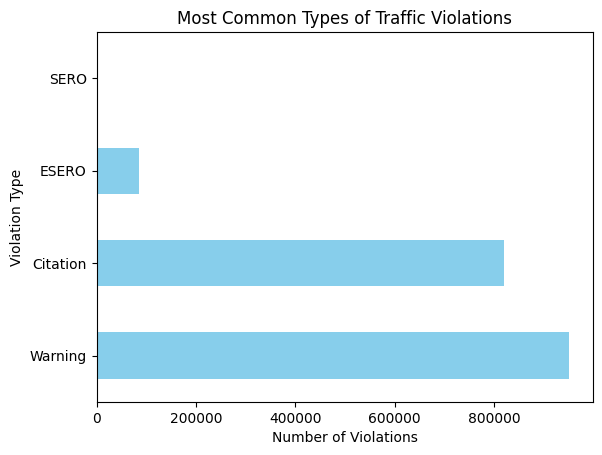

In [34]:
#What are the most common types of traffic violations?

violation_distribution = data['Violation_Type'].value_counts()
violation_distribution.plot(kind='barh', color='skyblue')
plt.title('Most Common Types of Traffic Violations')
plt.xlabel('Number of Violations')
plt.ylabel('Violation Type')
plt.show()

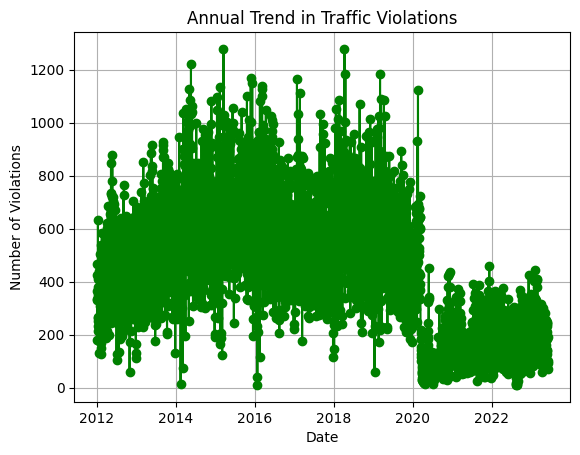

In [36]:
# Are there any annual trend in traffic violations? 

violation_by_date = data.groupby(data['Date_Of_Stop'].dt.date)['Violation_Type'].count()
violation_by_date.plot(kind='line', marker='o', color='green')
plt.title('Annual Trend in Traffic Violations')
plt.xlabel('Date')
plt.ylabel('Number of Violations')
plt.grid(True)
plt.show()


/var/folders/q2/k9xdm7wn3_7cpc75plnlzl640000gn/T/ipykernel_82818/1597356467.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Day_of_Week', data=data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')


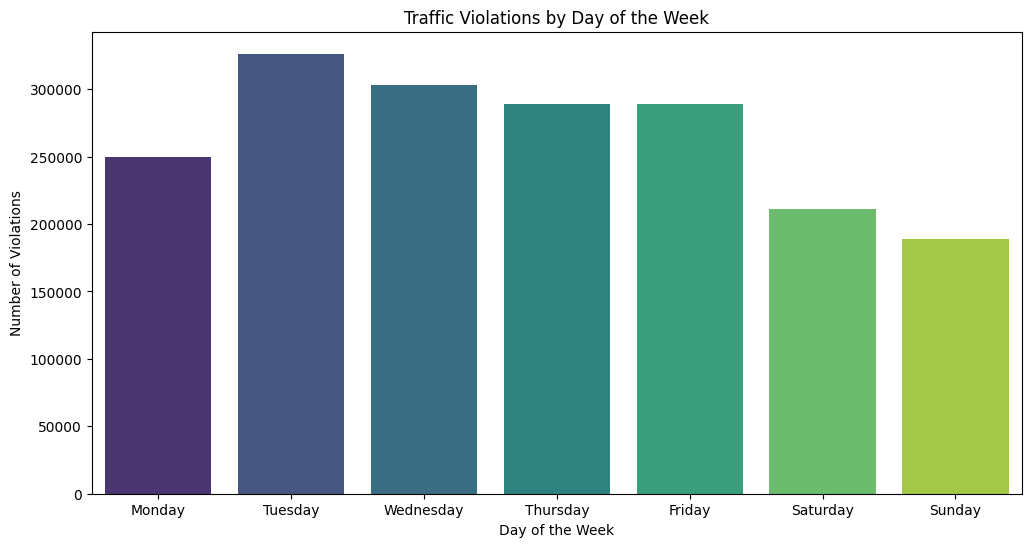

In [37]:
#is there a particular day when violations are more frequent?

plt.figure(figsize=(12, 6))
sns.countplot(x='Day_of_Week', data=data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')
plt.title('Traffic Violations by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Violations')
plt.show()

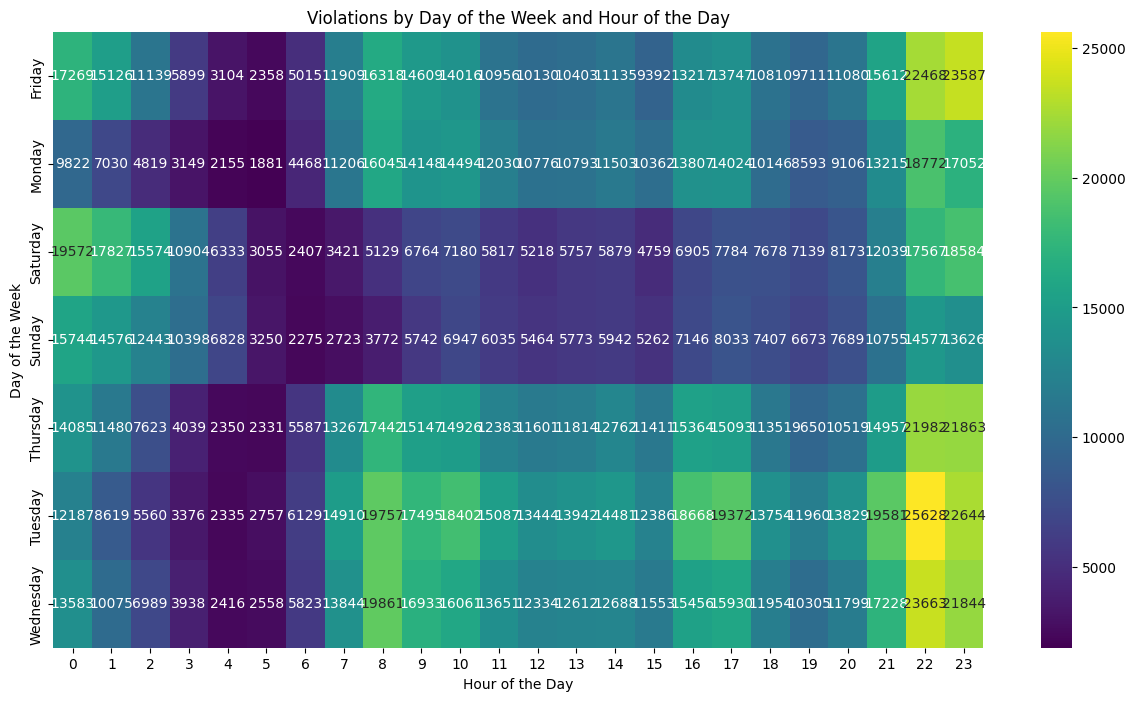

In [38]:
#is there a particular time when violations are more frequent?

heatmap_data = data.groupby(['Day_of_Week', 'Hour_of_Day']).size().unstack()
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='g')
plt.title('Violations by Day of the Week and Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()

/var/folders/q2/k9xdm7wn3_7cpc75plnlzl640000gn/T/ipykernel_82818/1351151458.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette='viridis')


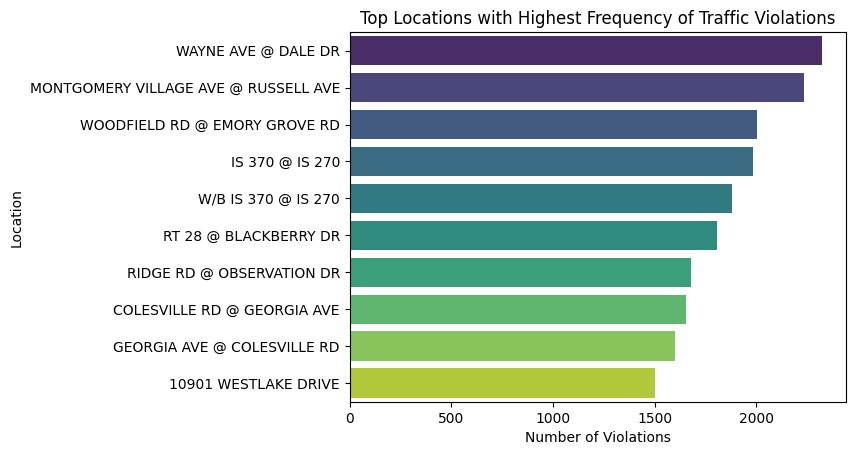

In [39]:
# Which locations have the highest frequency of traffic violations?

top_locations = data['Location'].value_counts().head(10)
sns.barplot(x=top_locations.values, y=top_locations.index, palette='viridis')
plt.title('Top Locations with Highest Frequency of Traffic Violations')
plt.xlabel('Number of Violations')
plt.ylabel('Location')
plt.show()

Race
WHITE              633377
BLACK              591728
HISPANIC           410301
OTHER              113203
ASIAN              105419
NATIVE AMERICAN      3351
Name: count, dtype: int64


/var/folders/q2/k9xdm7wn3_7cpc75plnlzl640000gn/T/ipykernel_82818/1582014403.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Race', data=data, palette='Set1')


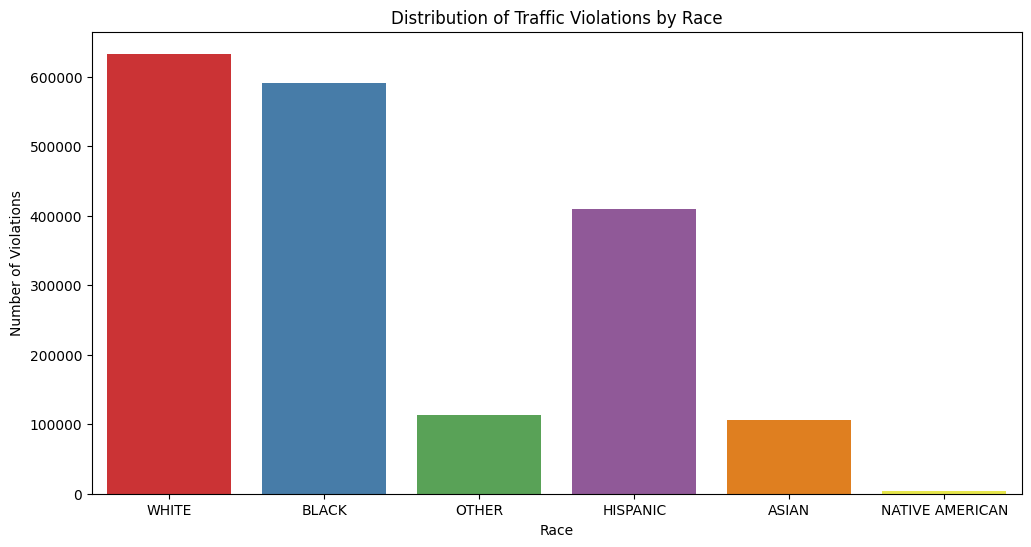

In [40]:
# Are there any race disparities in traffic violations? 

race_distribution = data['Race'].value_counts()
print(race_distribution)

plt.figure(figsize=(12, 6))
sns.countplot(x='Race', data=data, palette='Set1')
plt.title('Distribution of Traffic Violations by Race')
plt.xlabel('Race')
plt.ylabel('Number of Violations')
plt.show()


Gender
M    1249707
F     604849
U       2823
Name: count, dtype: int64


/var/folders/q2/k9xdm7wn3_7cpc75plnlzl640000gn/T/ipykernel_46617/856179284.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data, palette='pastel')


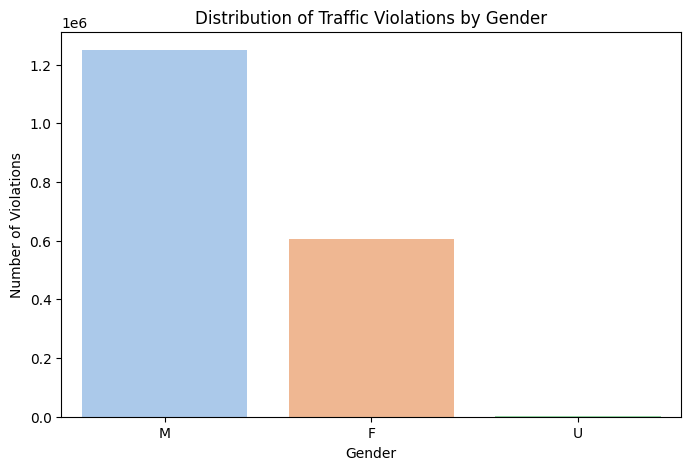

In [105]:
# Are there any gender disparities in traffic violations? 

gender_distribution = data['Gender'].value_counts()
print(gender_distribution)

plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=data, palette='pastel')
plt.title('Distribution of Traffic Violations by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Violations')
plt.show()

Search_Conducted
No     0.928116
Yes    0.071884
Name: proportion, dtype: float64


/var/folders/q2/k9xdm7wn3_7cpc75plnlzl640000gn/T/ipykernel_82818/3026903696.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=search_conducted_ratio.index, y=search_conducted_ratio.values * 100, palette='Blues')


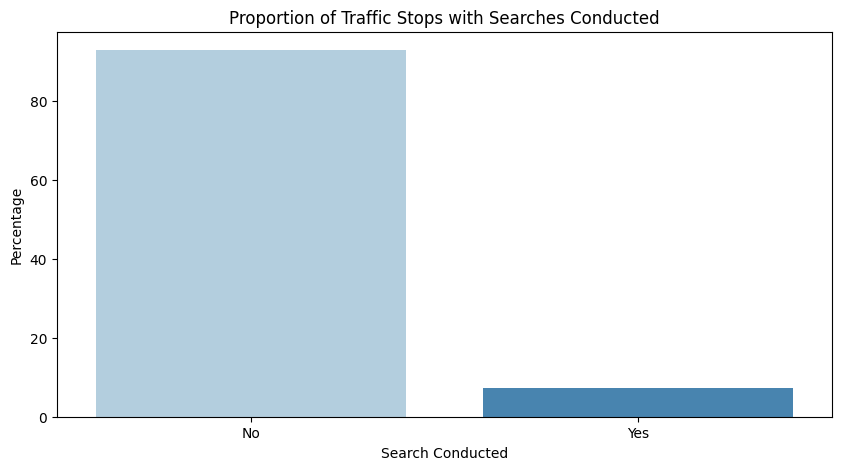

In [41]:
# What is the proportion of traffic stops where searches are conducted ?

search_conducted_ratio = data['Search_Conducted'].value_counts(normalize=True)
print(search_conducted_ratio)

plt.figure(figsize=(10, 5))
sns.barplot(x=search_conducted_ratio.index, y=search_conducted_ratio.values * 100, palette='Blues')
plt.title('Proportion of Traffic Stops with Searches Conducted')
plt.xlabel('Search Conducted')
plt.ylabel('Percentage')
plt.show()

Contributed_To_Accident
False    1807134
True       50245
Name: count, dtype: int64


/var/folders/q2/k9xdm7wn3_7cpc75plnlzl640000gn/T/ipykernel_82818/2483469839.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Contributed_To_Accident', data=df, palette='rocket')


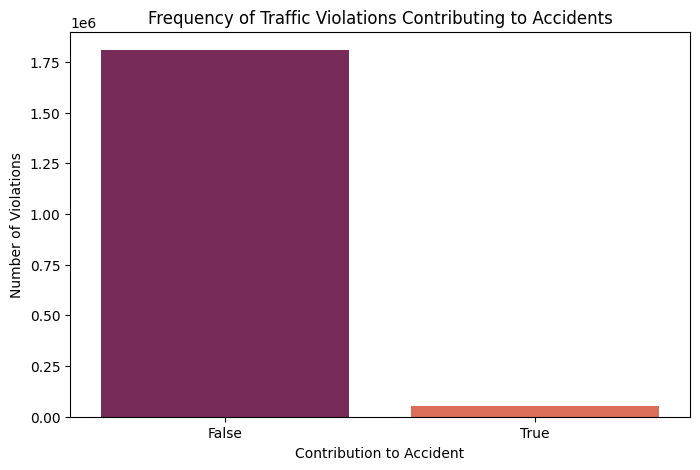

In [42]:
# How often do traffic violations contribute to accidents?

accident_contribution = data['Contributed_To_Accident'].value_counts()
print(accident_contribution)

plt.figure(figsize=(8, 5))
sns.countplot(x='Contributed_To_Accident', data=df, palette='rocket')
plt.title('Frequency of Traffic Violations Contributing to Accidents')
plt.xlabel('Contribution to Accident')
plt.ylabel('Number of Violations')
plt.show()

Arrest_Type
A - Marked Patrol                       1510307
Q - Marked Laser                         175560
B - Unmarked Patrol                       73708
S - License Plate Recognition             16235
G - Marked Moving Radar (Stationary)      16226
L - Motorcycle                            15894
O - Foot Patrol                           14610
E - Marked Stationary Radar               13193
R - Unmarked Laser                         8054
M - Marked (Off-Duty)                      4432
Name: count, dtype: int64


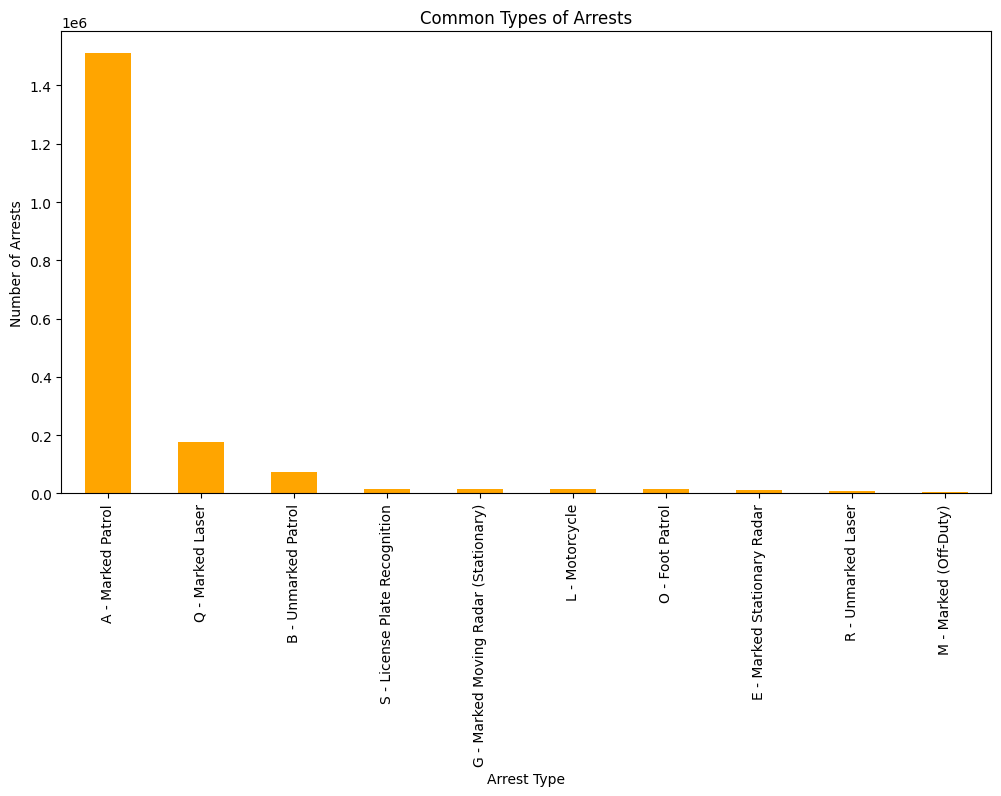

In [43]:
# what are the common types of arrests?

common_arrest_types = data['Arrest_Type'].value_counts().head(10)
print(common_arrest_types)

plt.figure(figsize=(12, 6))
common_arrest_types.plot(kind='bar', color='orange')
plt.title('Common Types of Arrests')
plt.xlabel('Arrest Type')
plt.ylabel('Number of Arrests')
plt.show()

Charge
21-801.1         247971
21-201(a1)       154928
13-409(b)         84234
21-707(a)         58282
13-401(h)         55414
16-112(c)         49161
13-411(f)         47471
21-1124.2(d2)     45150
16-303(c)         35828
16-303(h)         34090
Name: count, dtype: int64


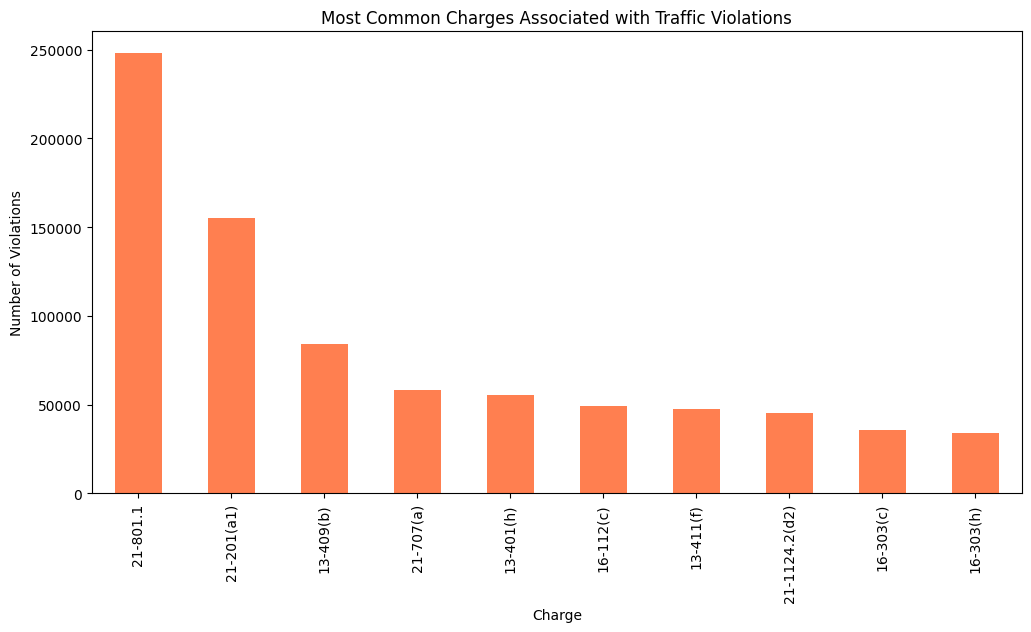

In [88]:
# What are the most common charges associated with traffic violations?
common_charges = data['Charge'].value_counts().head(10)
print(common_charges)


plt.figure(figsize=(12, 6))
common_charges.head(10).plot(kind='bar', color='coral')
plt.title('Most Common Charges Associated with Traffic Violations')
plt.xlabel('Charge')
plt.ylabel('Number of Violations')
plt.show()

### Numerical columns

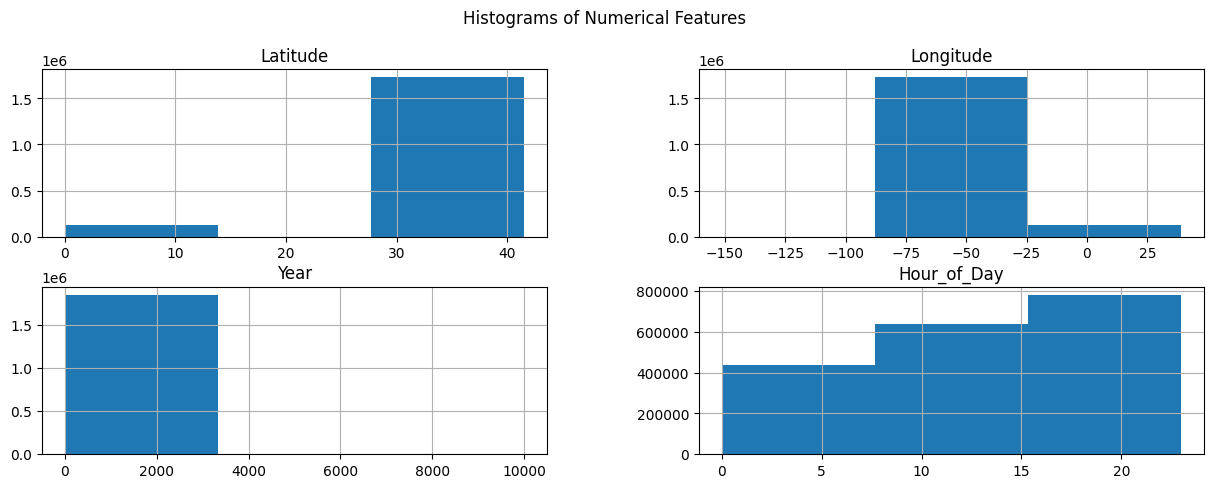

In [44]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols].hist(bins=3, figsize=(15, 5))
plt.suptitle('Histograms of Numerical Features', y=1)
plt.show()

### categorical columns

In [23]:
categorical_cols = data.select_dtypes(include=['object']).columns

short_columns = []

for col in categorical_cols:
    if data[col].nunique() < 11:
        short_columns.append(col)
    else:
       pass

print(short_columns)

['Agency', 'SubAgency', 'Accident', 'Belts', 'Personal_Injury', 'Property_Damage', 'Fatal', 'Commercial_License', 'HAZMAT', 'Commercial_Vehicle', 'Alcohol', 'Work_Zone', 'Search_Conducted', 'Search_Disposition', 'Search_Outcome', 'Search_Reason', 'Search_Type', 'Search_Arrest_Reason', 'Violation_Type', 'Article', 'Race', 'Gender']


In [34]:
short_categotical = data[short_columns]#.apply(lambda x: x.value_counts(normalize=True) * 100)
short_categotical.isnull().sum()

Agency                        0
SubAgency                     0
Accident                      0
Belts                         0
Personal_Injury               0
Property_Damage               0
Fatal                         0
Commercial_License            0
HAZMAT                        0
Commercial_Vehicle            0
Alcohol                       0
Work_Zone                     0
Search_Conducted         704972
Search_Disposition      1776435
Search_Outcome           724229
Search_Reason           1776435
Search_Type             1776443
Search_Arrest_Reason    1802720
Violation_Type                0
Article                   85439
Race                          0
Gender                        0
dtype: int64

In [38]:
for col in short_categotical:
    value_counts = short_categotical[col].value_counts(normalize=True) * 100
    value_counts
value_counts

Gender
M    67.289809
F    32.558170
U     0.152021
Name: proportion, dtype: float64

In [33]:
percentage_distribution['Gender'].unique()

array(['M', 'F', 'U'], dtype=object)

/var/folders/q2/k9xdm7wn3_7cpc75plnlzl640000gn/T/ipykernel_77416/3360078578.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


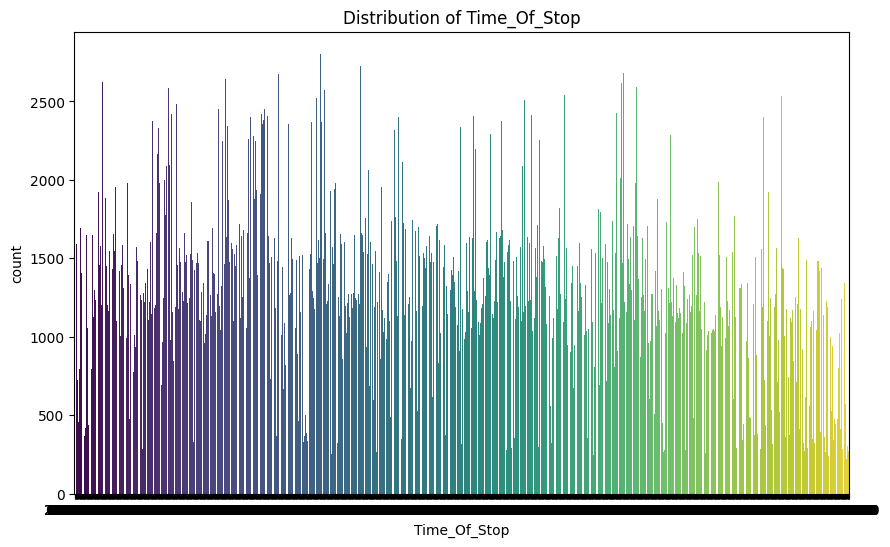

/var/folders/q2/k9xdm7wn3_7cpc75plnlzl640000gn/T/ipykernel_77416/3360078578.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


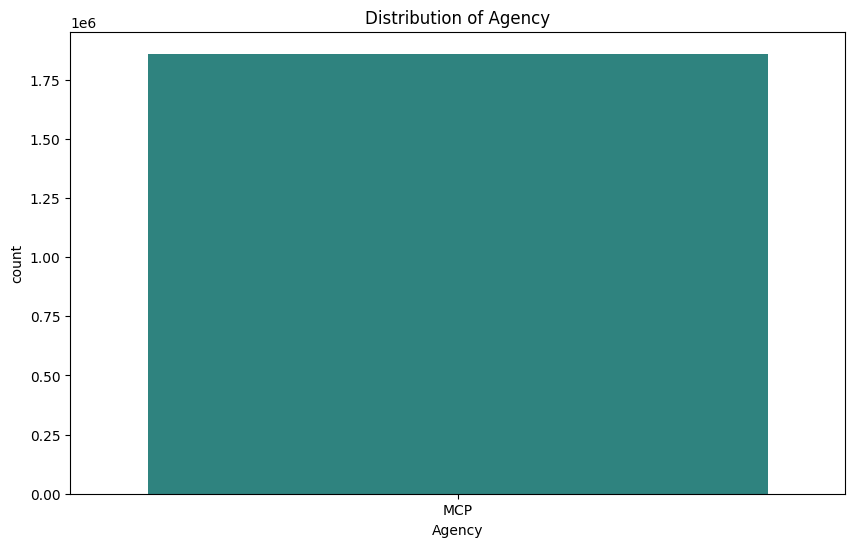

/var/folders/q2/k9xdm7wn3_7cpc75plnlzl640000gn/T/ipykernel_77416/3360078578.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


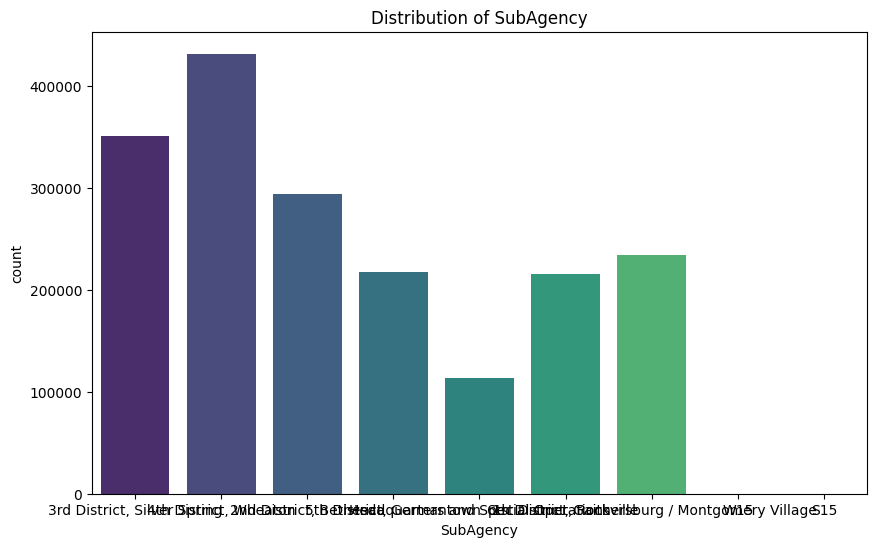

/var/folders/q2/k9xdm7wn3_7cpc75plnlzl640000gn/T/ipykernel_77416/3360078578.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


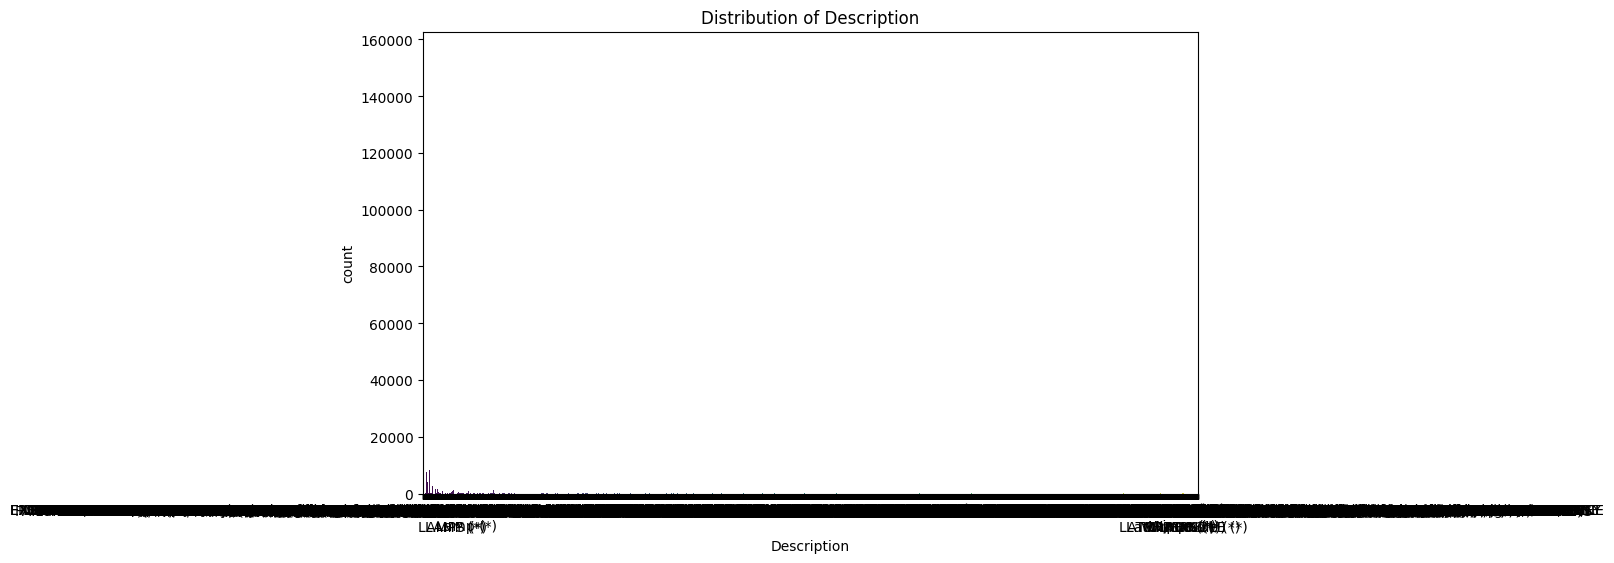

/var/folders/q2/k9xdm7wn3_7cpc75plnlzl640000gn/T/ipykernel_77416/3360078578.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


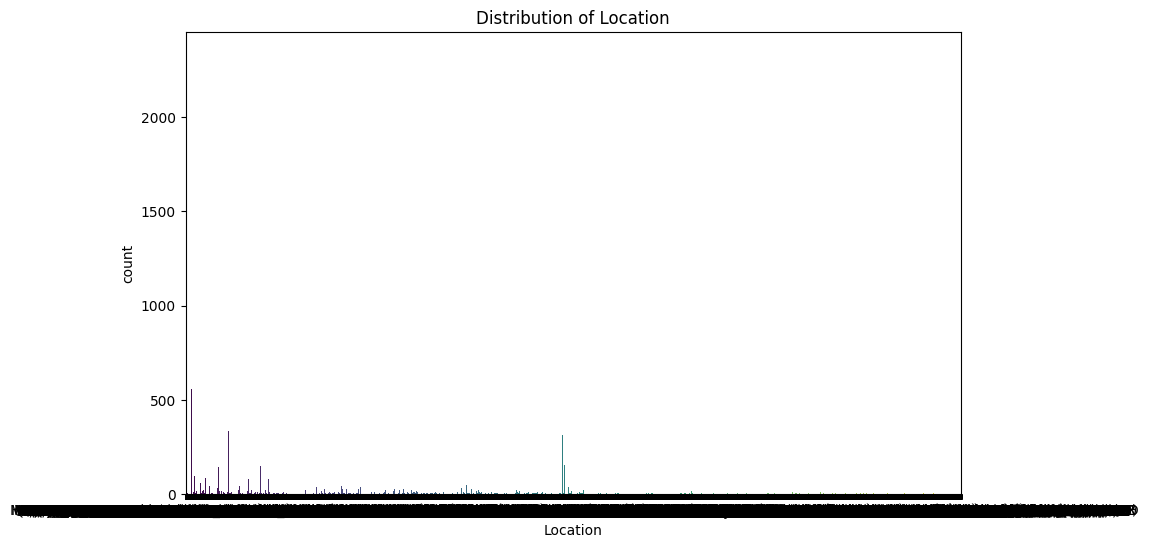

/var/folders/q2/k9xdm7wn3_7cpc75plnlzl640000gn/T/ipykernel_77416/3360078578.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


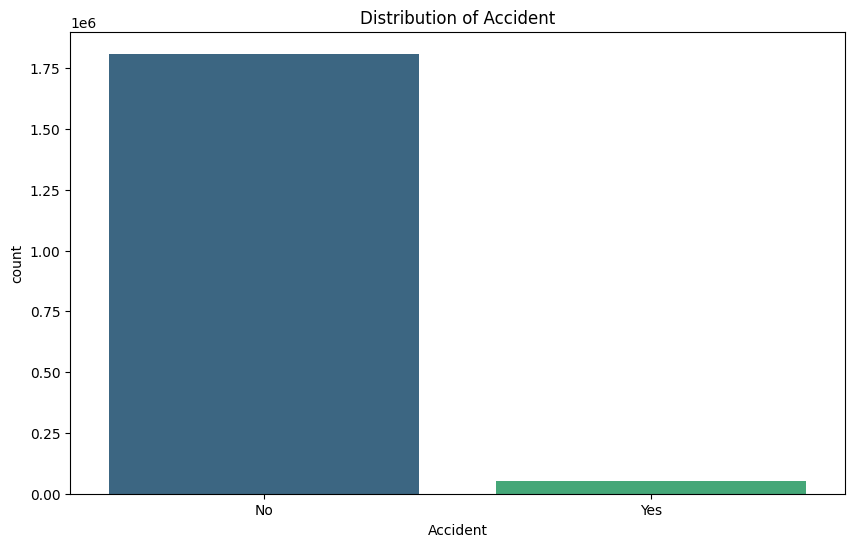

/var/folders/q2/k9xdm7wn3_7cpc75plnlzl640000gn/T/ipykernel_77416/3360078578.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


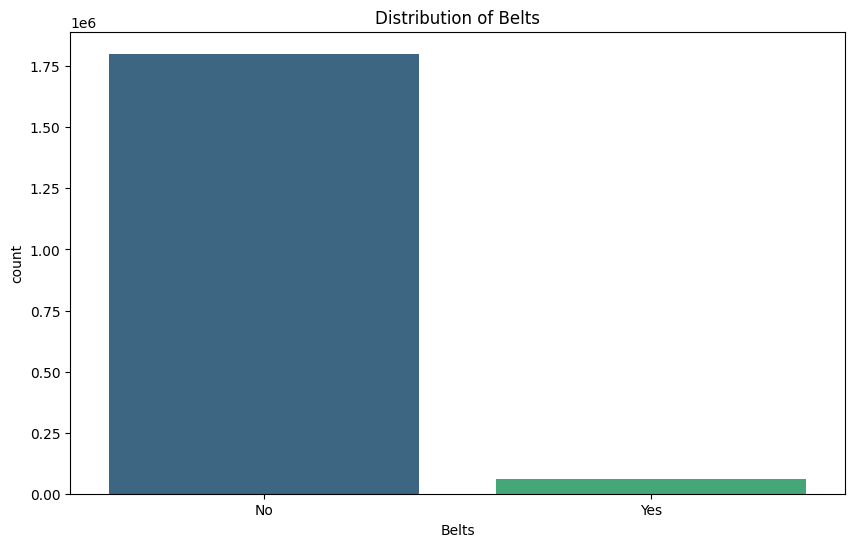

/var/folders/q2/k9xdm7wn3_7cpc75plnlzl640000gn/T/ipykernel_77416/3360078578.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


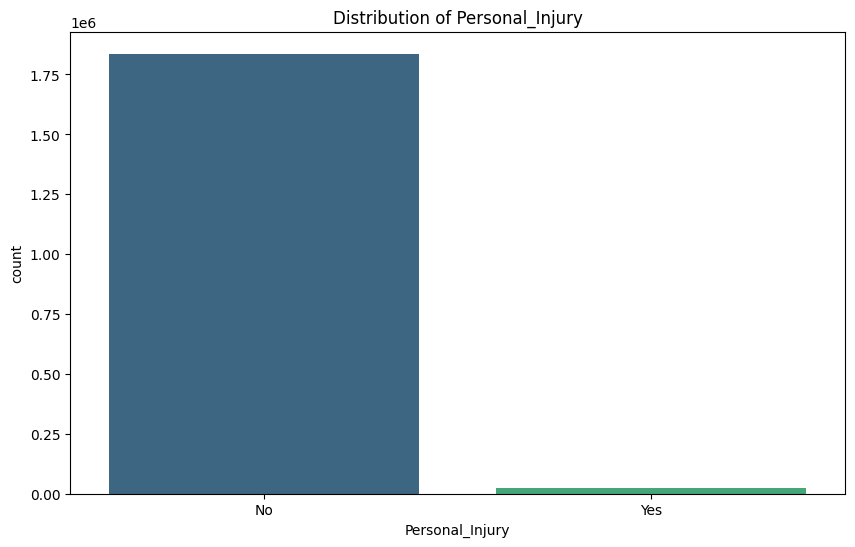

/var/folders/q2/k9xdm7wn3_7cpc75plnlzl640000gn/T/ipykernel_77416/3360078578.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


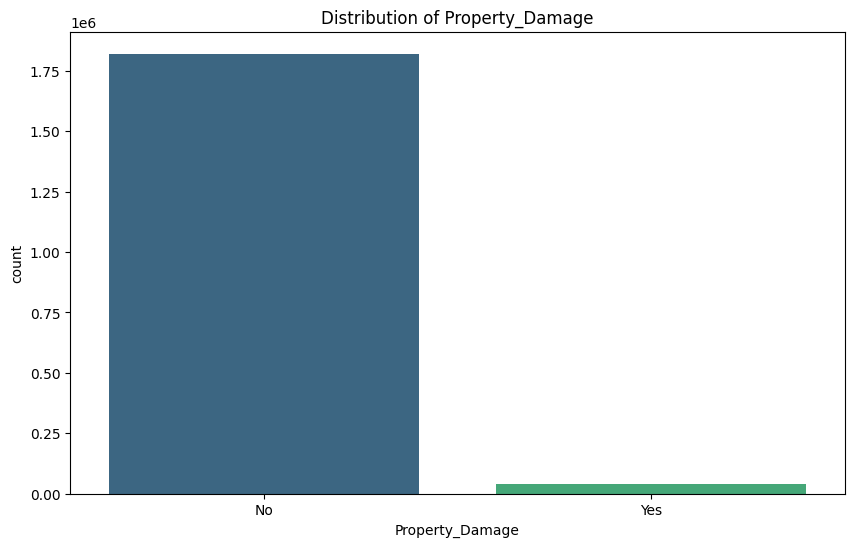

/var/folders/q2/k9xdm7wn3_7cpc75plnlzl640000gn/T/ipykernel_77416/3360078578.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


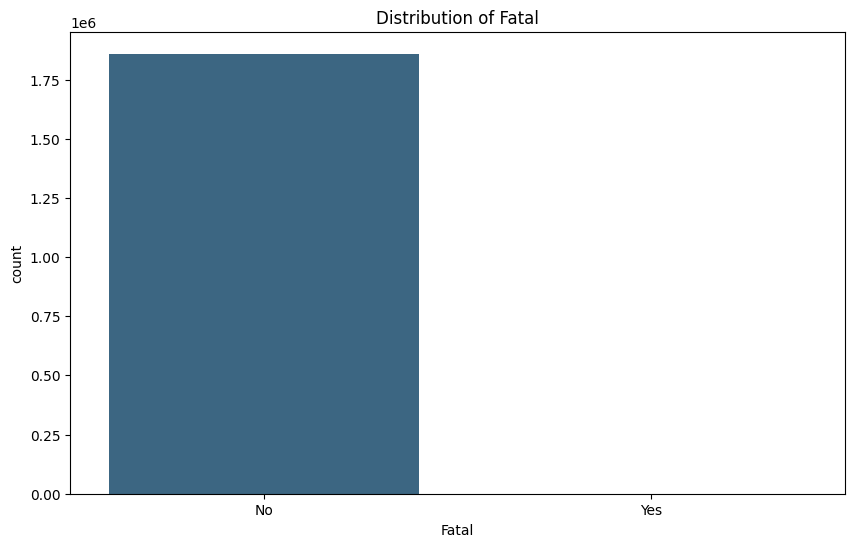

/var/folders/q2/k9xdm7wn3_7cpc75plnlzl640000gn/T/ipykernel_77416/3360078578.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


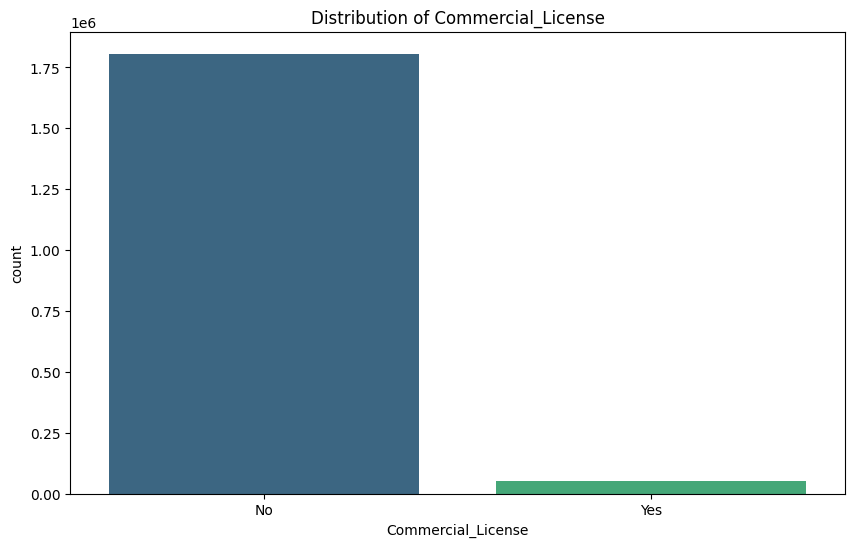

/var/folders/q2/k9xdm7wn3_7cpc75plnlzl640000gn/T/ipykernel_77416/3360078578.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


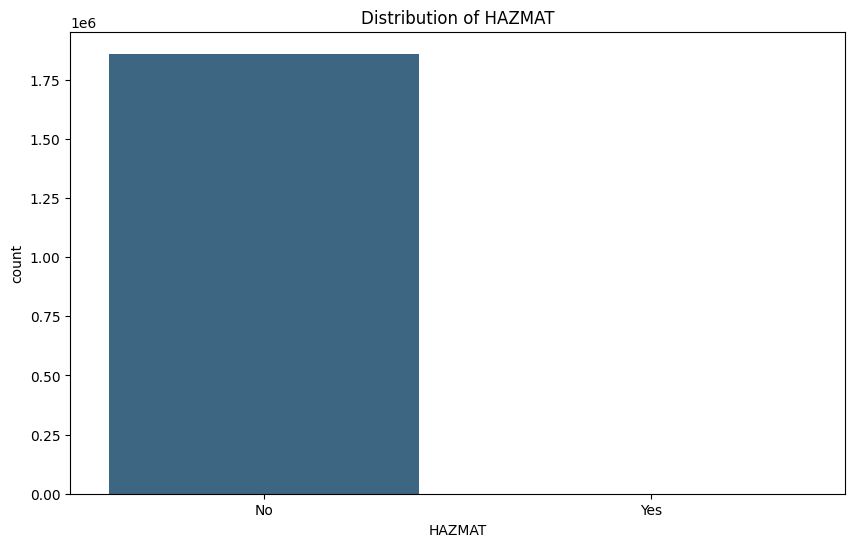

/var/folders/q2/k9xdm7wn3_7cpc75plnlzl640000gn/T/ipykernel_77416/3360078578.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


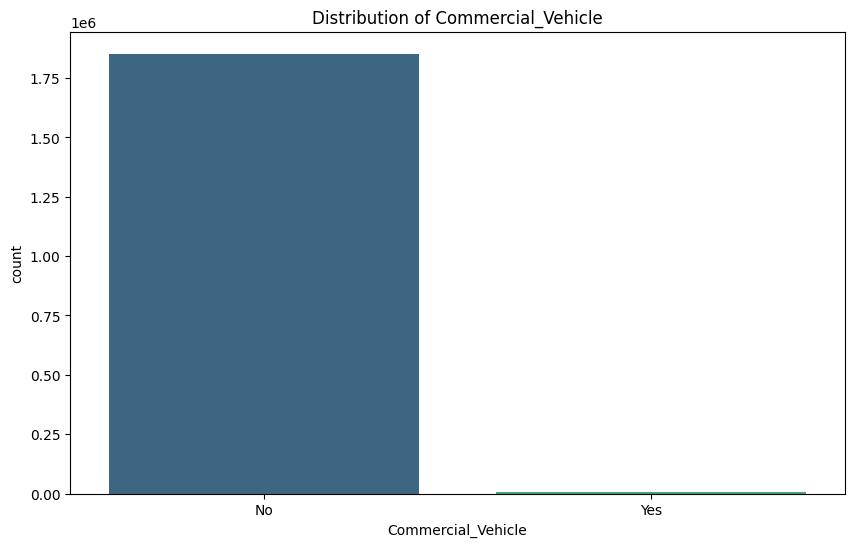

/var/folders/q2/k9xdm7wn3_7cpc75plnlzl640000gn/T/ipykernel_77416/3360078578.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


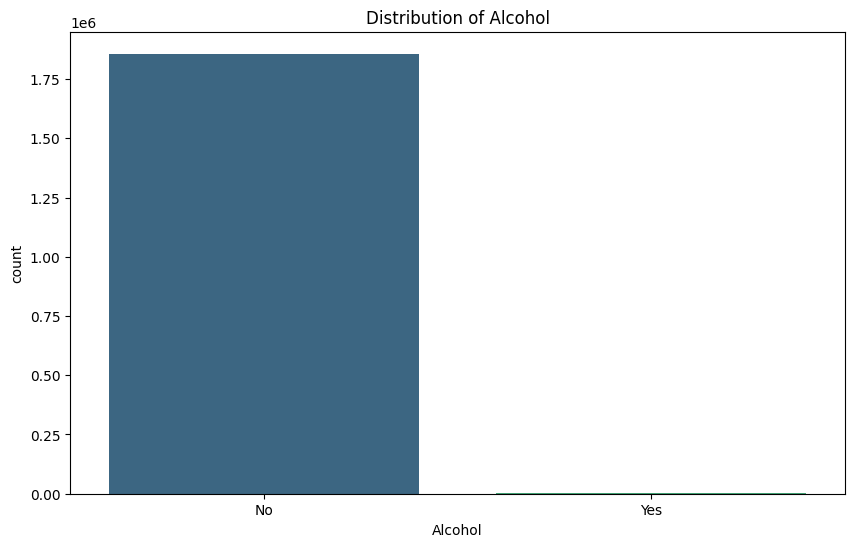

/var/folders/q2/k9xdm7wn3_7cpc75plnlzl640000gn/T/ipykernel_77416/3360078578.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


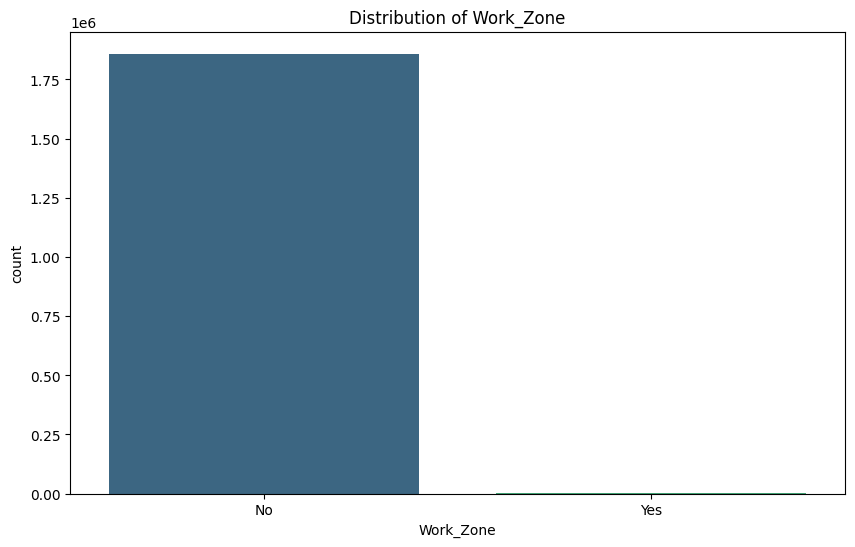

/var/folders/q2/k9xdm7wn3_7cpc75plnlzl640000gn/T/ipykernel_77416/3360078578.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


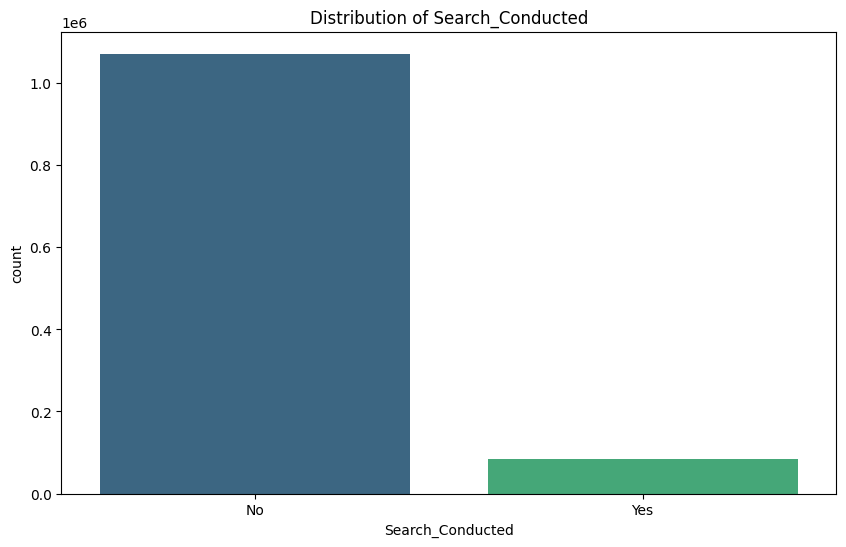

/var/folders/q2/k9xdm7wn3_7cpc75plnlzl640000gn/T/ipykernel_77416/3360078578.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


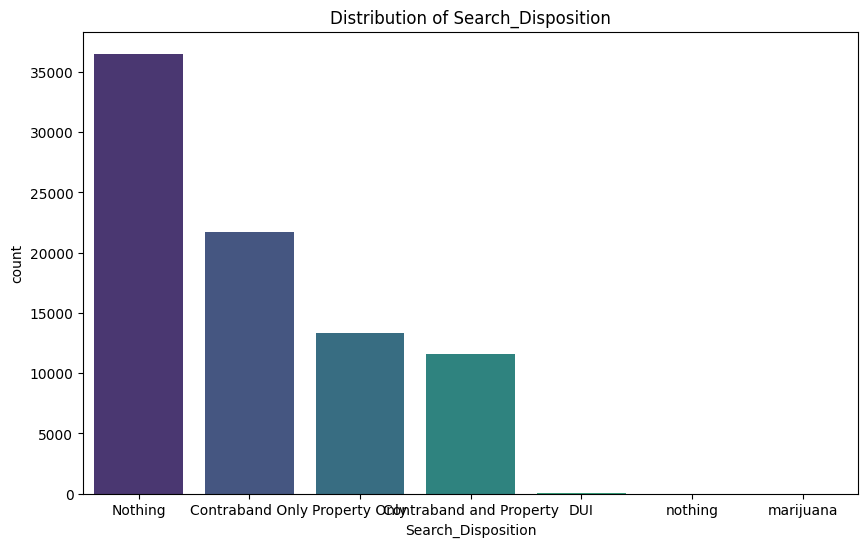

/var/folders/q2/k9xdm7wn3_7cpc75plnlzl640000gn/T/ipykernel_77416/3360078578.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


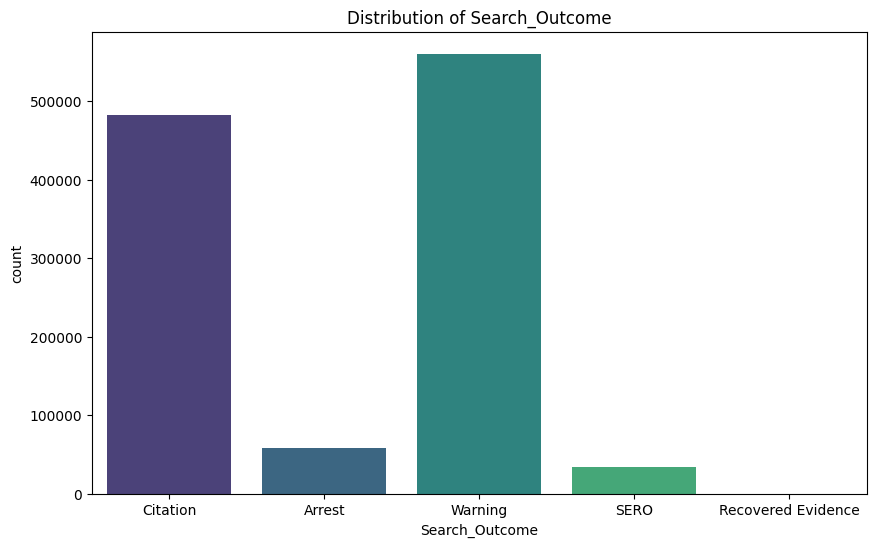

/var/folders/q2/k9xdm7wn3_7cpc75plnlzl640000gn/T/ipykernel_77416/3360078578.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


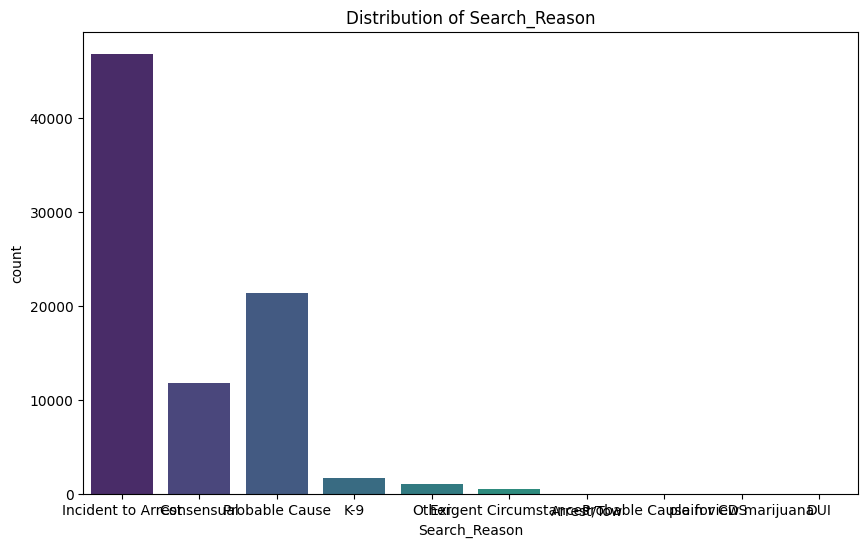

/var/folders/q2/k9xdm7wn3_7cpc75plnlzl640000gn/T/ipykernel_77416/3360078578.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


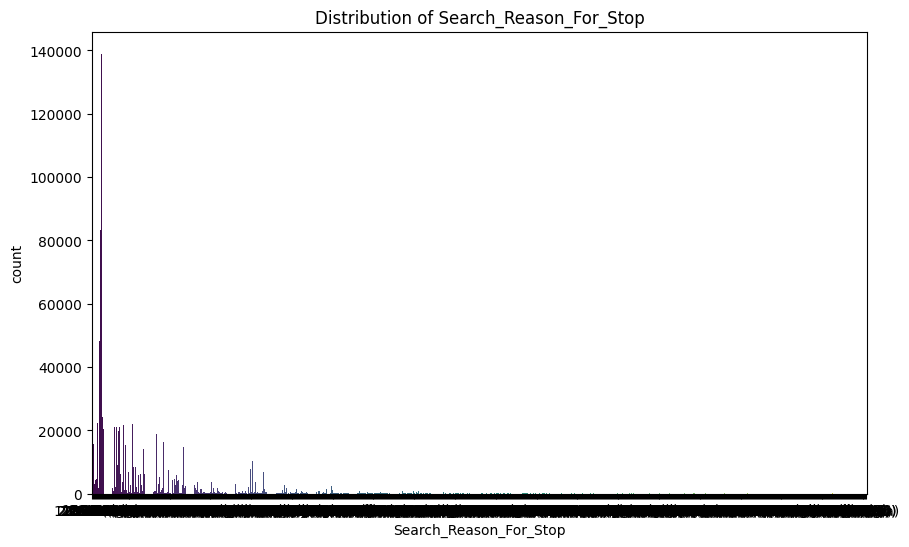

/var/folders/q2/k9xdm7wn3_7cpc75plnlzl640000gn/T/ipykernel_77416/3360078578.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


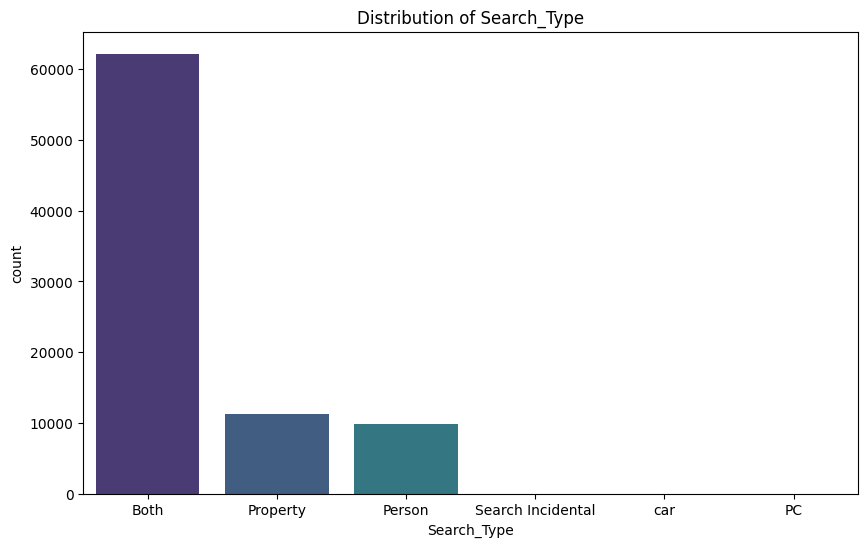

/var/folders/q2/k9xdm7wn3_7cpc75plnlzl640000gn/T/ipykernel_77416/3360078578.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


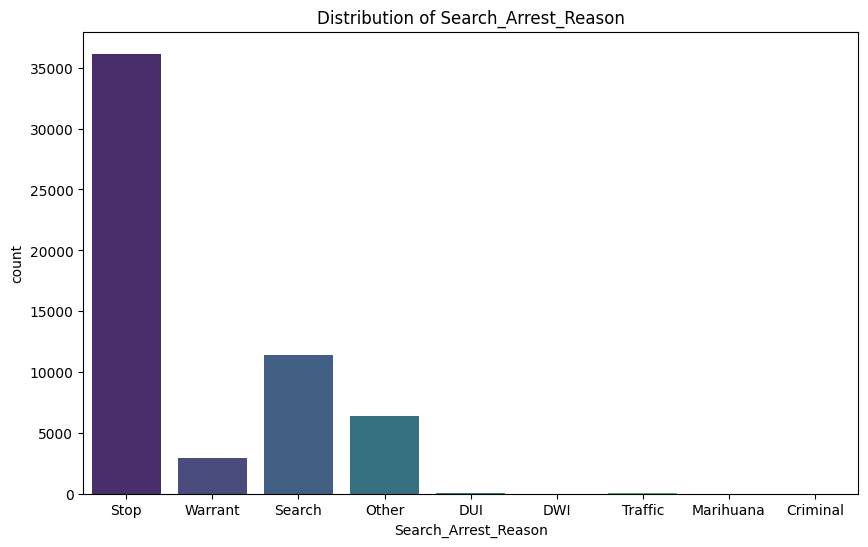

/var/folders/q2/k9xdm7wn3_7cpc75plnlzl640000gn/T/ipykernel_77416/3360078578.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


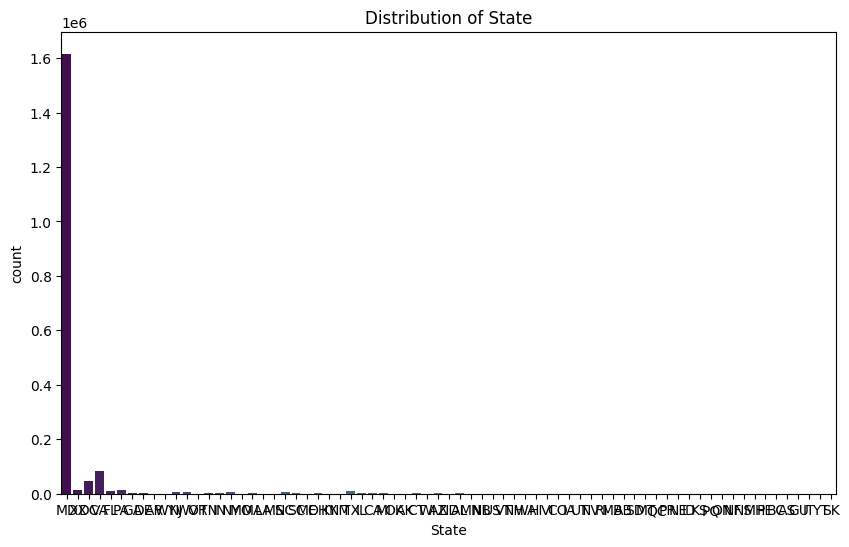

/var/folders/q2/k9xdm7wn3_7cpc75plnlzl640000gn/T/ipykernel_77416/3360078578.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


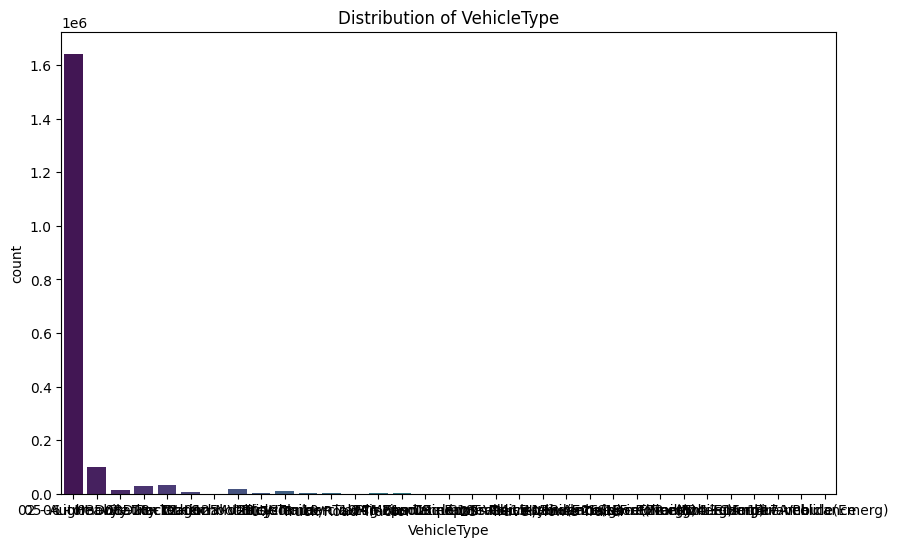

/var/folders/q2/k9xdm7wn3_7cpc75plnlzl640000gn/T/ipykernel_77416/3360078578.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


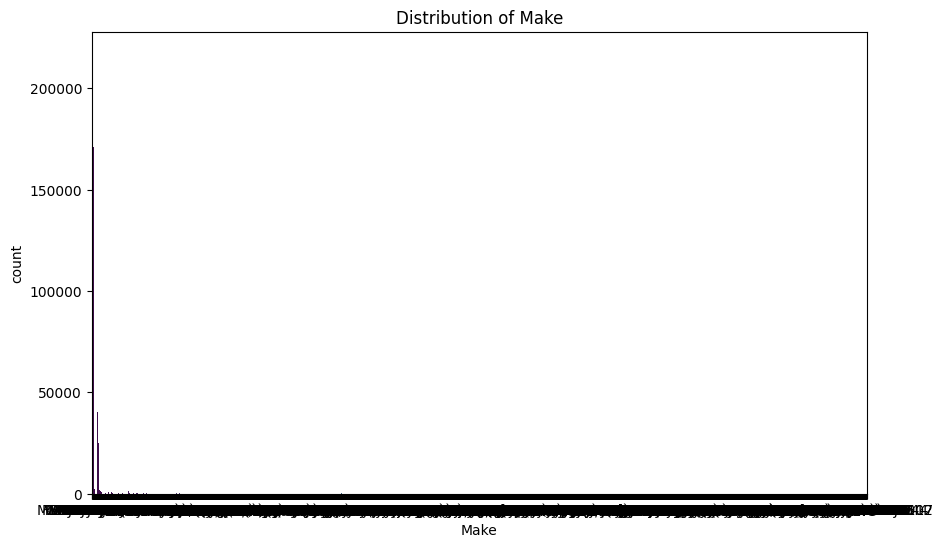

/var/folders/q2/k9xdm7wn3_7cpc75plnlzl640000gn/T/ipykernel_77416/3360078578.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


KeyboardInterrupt: 

In [108]:
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.show()

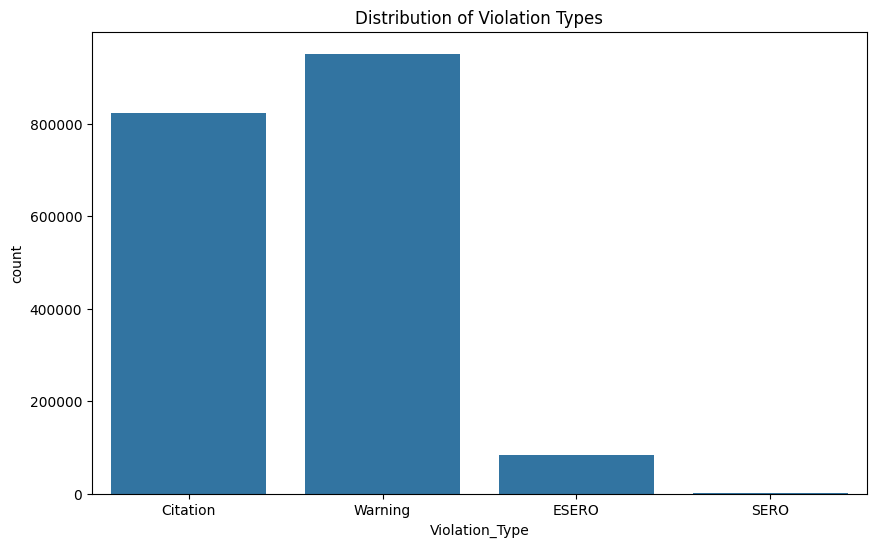

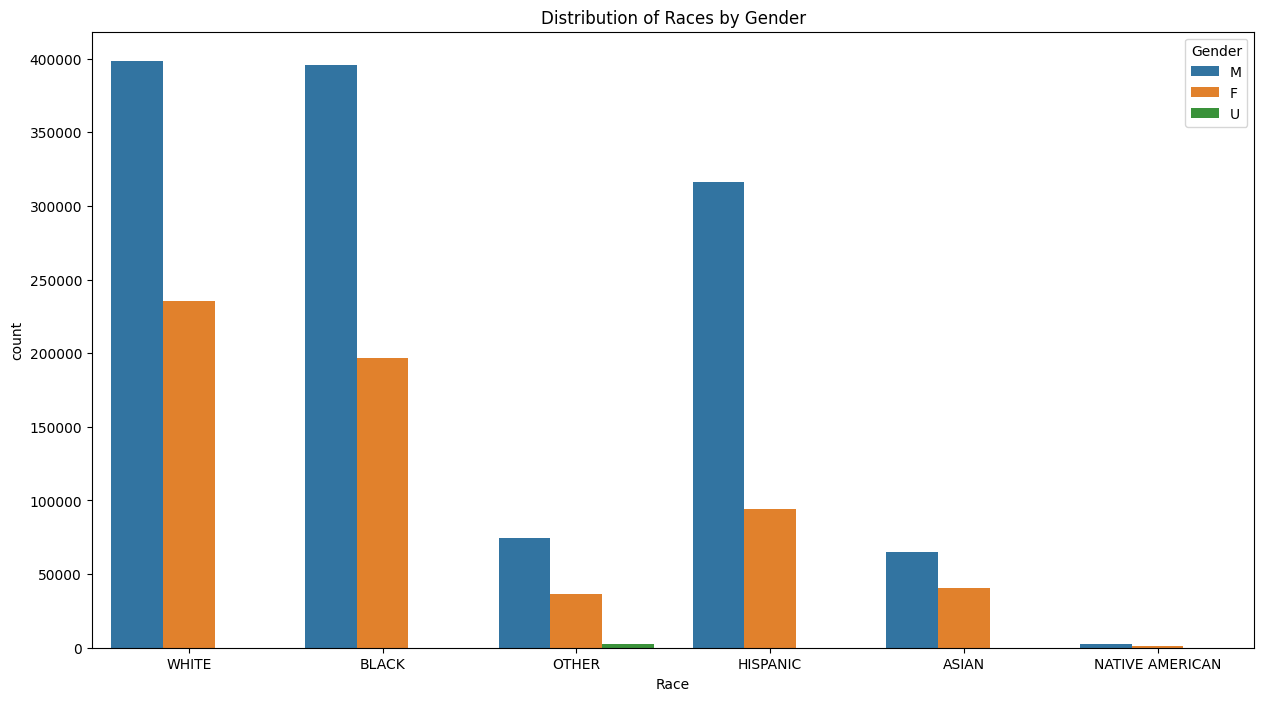

In [56]:

# Visualize the distribution of the target variable 'Violation_Type'
plt.figure(figsize=(10, 6))
sns.countplot(x='Violation_Type', data=data)
plt.title('Distribution of Violation Types')
plt.show()

# Visualize the distribution of some categorical features
plt.figure(figsize=(15, 8))
sns.countplot(x='Race', data=data, hue='Gender')
plt.title('Distribution of Races by Gender')
plt.show()


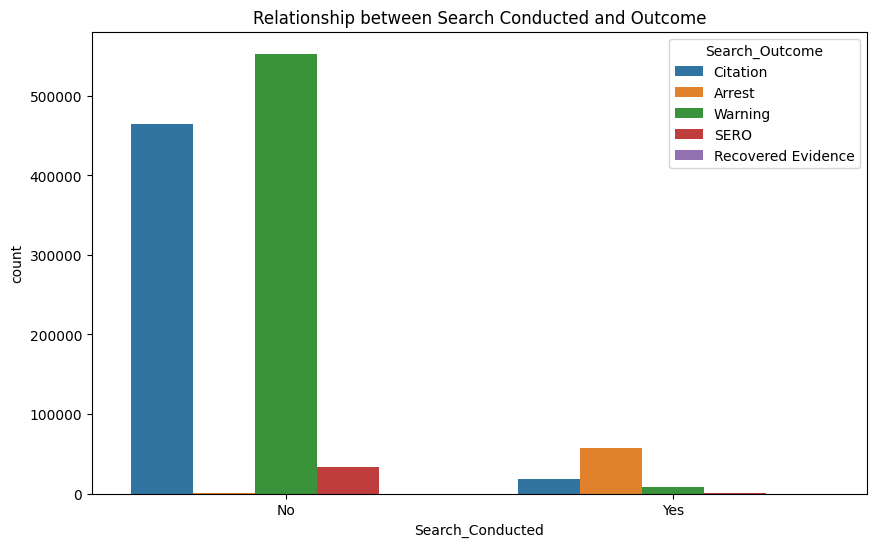

In [91]:
# Explore the relationship between 'Search_Conducted' and 'Search_Outcome'
plt.figure(figsize=(10, 6))
sns.countplot(x='Search_Conducted', data=data, hue='Search_Outcome')
plt.title('Relationship between Search Conducted and Outcome')
plt.show()


In [ ]:
# Correlation matrix for numerical features
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [24]:
data.Violation_Type.unique()

array(['Citation', 'Warning', 'ESERO', 'SERO'], dtype=object)

In [11]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1859607 entries, 0 to 1859606
Data columns (total 42 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Date Of Stop             object 
 1   Time Of Stop             object 
 2   Agency                   object 
 3   SubAgency                object 
 4   Description              object 
 5   Location                 object 
 6   Latitude                 float64
 7   Longitude                float64
 8   Accident                 object 
 9   Belts                    object 
 10  Personal_Injury          object 
 11  Property Damage          object 
 12  Fatal                    object 
 13  Commercial License       object 
 14  HAZMAT                   object 
 15  Commercial Vehicle       object 
 16  Alcohol                  object 
 17  Work_Zone                object 
 18  Search_Conducted         object 
 19  Search Disposition       object 
 20  Search_Outcome           object 
 21  Search_R

,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,...,Charge,Article,Contributed_To_Accident,Race,Gender,Driver_City,Driver_State,DL_State,Arrest_Type,Geolocation
0,05/01/2023,23:11:00,MCP,"3rd District, Silver Spring",OPERATING UNREGISTERED MOTOR VEHICLE ON HIGHWAY,BRIGGS CHANEY RD @ COLUMIBA PIKE,0.000000,0.000000,No,No,...,13-401(b1),Transportation Article,False,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,"(0.0, 0.0)"
1,04/30/2023,23:55:00,MCP,"4th District, Wheaton",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,KEMP MILL ROAD @ ALPERT LANE,39.053038,-77.024637,No,No,...,13-401(h),Transportation Article,False,WHITE,F,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.0530383333333, -77.0246366666667)"
2,04/30/2023,04:24:00,MCP,"2nd District, Bethesda",NEGLIGENT DRIVING VEHICLE IN CARELESS AND IMPR...,JONES MILL ROAD/ LE VELLE DRIVE,38.991480,-77.097113,No,No,...,21-901.1(b),Transportation Article,False,BLACK,F,SILVER SPRING,MD,MD,A - Marked Patrol,"(38.99148, -77.0971133333333)"
3,04/30/2023,04:24:00,MCP,"2nd District, Bethesda",RECKLESS DRIVING VEHICLE IN WANTON AND WILLFUL...,JONES MILL ROAD/ LE VELLE DRIVE,38.991480,-77.097113,No,No,...,21-901.1(a),Transportation Article,False,BLACK,F,SILVER SPRING,MD,MD,A - Marked Patrol,"(38.99148, -77.0971133333333)"
4,04/30/2023,04:24:00,MCP,"2nd District, Bethesda",FAILURE TO DRIVE VEHICLE ON RIGHT HALF OF ROAD...,JONES MILL ROAD/ LE VELLE DRIVE,38.991480,-77.097113,No,No,...,21-301(a),Transportation Article,False,BLACK,F,SILVER SPRING,MD,MD,A - Marked Patrol,"(38.99148, -77.0971133333333)"


### Some Lat Long analysis

In [21]:
zero_lat = data[data.Latitude == 0.000000]
print(zero_lat.shape)
print(zero_lat.Accident.unique())
print(zero_lat.Longitude.unique())
zero_lat.head()


(128791, 42)
['No' 'Yes']
[0.         0.01666667]


,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,...,Charge,Article,Contributed_To_Accident,Race,Gender,Driver_City,Driver_State,DL_State,Arrest_Type,Geolocation
0,05/01/2023,23:11:00,MCP,"3rd District, Silver Spring",OPERATING UNREGISTERED MOTOR VEHICLE ON HIGHWAY,BRIGGS CHANEY RD @ COLUMIBA PIKE,0.0,0.0,No,No,...,13-401(b1),Transportation Article,False,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,"(0.0, 0.0)"
9,04/30/2023,10:43:00,MCP,"3rd District, Silver Spring",PERSON DRIVING MOTOR VEHICLE ON HIGHWAY OR PUB...,650 AT LOCKWOOD DR,0.0,0.0,No,Yes,...,16-303(c),Transportation Article,False,BLACK,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(0.0, 0.0)"
10,04/30/2023,10:43:00,MCP,"3rd District, Silver Spring",DISPLAYING REG. PLATE ISSUED FOR OTHER VEHICLE,650 AT LOCKWOOD DR,0.0,0.0,No,Yes,...,13-411(g),Transportation Article,False,BLACK,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(0.0, 0.0)"
11,04/30/2023,10:43:00,MCP,"3rd District, Silver Spring","DRIVING WHILE LIC. SUSP. UNDER 16-203, 16-206A...",650 AT LOCKWOOD DR,0.0,0.0,No,Yes,...,16-303(h),Transportation Article,False,BLACK,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(0.0, 0.0)"
12,04/30/2023,10:43:00,MCP,"3rd District, Silver Spring",KNOWINGLY DRIVING UNINSURED VEHICLE,650 AT LOCKWOOD DR,0.0,0.0,No,Yes,...,17-107(a1),Transportation Article,False,BLACK,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(0.0, 0.0)"


In [22]:
data.isnull().sum()

Date Of Stop                     0
Time Of Stop                     0
Agency                           0
SubAgency                        0
Description                     10
Location                         4
Latitude                         0
Longitude                        0
Accident                         0
Belts                            0
Personal_Injury                  0
Property Damage                  0
Fatal                            0
Commercial License               0
HAZMAT                           0
Commercial Vehicle               0
Alcohol                          0
Work_Zone                        0
Search_Conducted            704972
Search Disposition         1776435
Search_Outcome              724229
Search_Reason              1776435
Search_Reason_For_Stop      705239
Search_Type                1776443
Search_Arrest_Reason       1802720
State                           59
VehicleType                      0
Year                         10344
Make                

In [23]:
data.nunique()

Date Of Stop                 4172
Time Of Stop                 1440
Agency                          1
SubAgency                       9
Description                 16201
Location                   245591
Latitude                   339743
Longitude                  383063
Accident                        2
Belts                           2
Personal_Injury                 2
Property Damage                 2
Fatal                           2
Commercial License              2
HAZMAT                          2
Commercial Vehicle              2
Alcohol                         2
Work_Zone                       2
Search_Conducted                2
Search Disposition              7
Search_Outcome                  5
Search_Reason                  10
Search_Reason_For_Stop        794
Search_Type                     6
Search_Arrest_Reason            9
State                          71
VehicleType                    33
Year                          397
Make                         4540
Model         